### Some Toy Data

In [7]:
import pandas as pd

In [8]:
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}

In [9]:
X =  pd.DataFrame.from_dict(xdic)
y = pd.DataFrame.from_dict(ydic)

In [10]:
import numpy as np

In [11]:
x_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

### Creating Model

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
degree = 9

In [15]:
# linear regression
linear_model = LinearRegression()
linear_model.fit(X,y)
y_pred = linear_model.predict(X)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y,y_pred))))

RMSE : 40432.77


In [16]:
# polynomial model with degree 9 
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X,y)
y_pred = polyreg.predict(X)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y,y_pred))))

RMSE : 27301.40


### Creating Plot

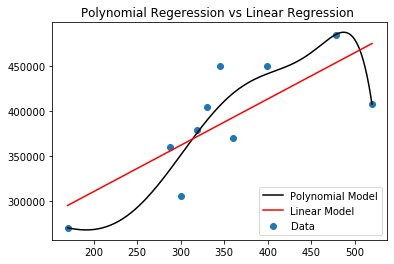

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X,y,label='Data')
plt.plot(x_seq,polyreg.predict(x_seq), color='black',label='Polynomial Model')
plt.plot(x_seq,linear_model.predict(x_seq), color='red',label='Linear Model')
plt.title('Polynomial Regeression vs Linear Regression ')
plt.legend(loc='lower right')
plt.show()

In [22]:
from sklearn.metrics import r2_score
print('R2 score of Linear Regression model: {:.2f}'.format(r2_score(y, linear_model.predict(X))))
print('R2 score of Polynomial Regression model: {:.2f}'.format(r2_score(y, polyreg.predict(X))))

R2 score of Linear Regression model: 0.59
R2 score of Polynomial Regression model: 0.81
